<h1><center>Analysis of Reddit Post Features (Across 3 Subreddits)</center></h1>

### Published By: Ronak Thakur
### Publish Date: 12/20/2021

## Introduction

Welcome to my Data Science Analysis tutorial! The goal of this tutorial is to have any reader be able to easily follow the steps that are involved with an analysis project such as this one. The steps illustrated within this tutorial include: data retrieval, data tidying, exploratory data analysis (EDA), and finally a bit of machine learning with decision tree classification. 

The data I use comes from posts made on the social media website called Reddit. Reddit is a hub for users to create posts on (almost) any topic imaginable and share these posts in different categories/communities called "Subreddits." Each post is formatted in the style of a "forum" post, allowing the users who read a post to comment underneath it and start a thread of replies. Each post can also be "flaired" with a custom tag depending on the subreddit (which helps users identify what type of post it is). 

For example, User A can make a post describing their family Macaroni and Cheese recipe to the "recipes" subreddit (typically referred to as /r/recipes with the "/r/" referring to the format required to access the subreddit from the search bar of a browser) and flair their post with the "Text Recipe" flair. User B can then leave a comment under User A's post saying how they used the recipe and enjoyed it. User B can then leave User A's post with an "upvote" to show their support for the post. 

The goal of this analysis is to verify or dispute my hypothesis that the number of comments has a direct correlation with the number of upvotes a post gets. Additionally, I am also curious to see how impactful different flairs can have on the success of a post (and whether or not it is possible to guess what flair a post has based on its number of upvotes and comments). Although I believe that this hypothesis will be disputed in the end (and will explain why in my conclusion), I believe that working towards this hypothesis will lead to some interesting data analysis!


### Dataset Overview

- Data Source: https://www.kaggle.com/prakharrathi25/reddit-data-huge

The overall dataset is an accumulation of data from over 5,000 reddit posts across 38 different subreddits (curated by Prakhar Rathi). Within the dataset are CSV files for each subreddit used within the dataset. Each individual subreddit's CSV file contains the following features:

- (Index)
- ID
- is_Original
- Flair
- num_comments
- Title
- Subreddit
- Body
- URL
- Upvotes

The dataset also contains a CSV file containing a merged csv file of all the posts analyzed (across all 38 subreddits), however for this project I did not choose to use this CSV file due to the features it contained not lending itself to any real EDA. 

After reviewing all of the subreddits present within Rathi's dataset, I ended up choosing 3 individual subreddits to use within my data analysis:

- /r/ApplyingToCollege
- /r/ComputerScience
- /r/COVID19

I chose these 3 specific subreddits due to the wide range of data I believed I would get for each subreddit. For /r/ApplyingToCollege, I believed that there would be a higher overall number of posts with comments due to the subreddit being a hub for high school students asking questions during their college application process. I chose /r/ComputerScience because I believed that this subreddit may follow the model of "more comments = more upvotes" that I believed to be true (as this subreddit is not primarily a QA subreddit like /r/ApplyingToCollege). Finally, I chose /r/COVID19 because I believe there may have been many posts that had many controversial comment sections, and I am curious to see how this quality would affect my hypothesis.

### Data Subset Decision — Explained
The specific data I chose to work with for this project was a subset of the larger overall dataset. I wanted to choose this dataset to illustrate that, although data analysis works best on datasets with large amounts of numerical data, it is still possible to use data analysis techniques to draw meaningful conclusions and test hypotheses. 

As you will see while reading through this analysis, I was not given a large number of features to draw relationships between, and as such I had to take a different approach for my analysis. As a result, the following project uses three different subsets (3 subreddits) of the dataset for each step of the analysis. Although this sample may not be fully representative of the entire dataset (and of every post in every subreddit on Reddit), there are still meaningful conclusions that can be drawn. The goal of this project is to find and explain those conclusions.

In [1]:
# Imports to be used within the Notebook
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

## Part 1: Data Retrieval

The first step before any analysis is prepping our data into prepared data structures (such as pandas dataframes). Since the dataset I am using is an optimized dataset published on Kaggle, the data retrieval steps are extremely straightforward. After deciding on the three data files that I will use within the analysis, I downloaded the appropriate CSV files and added them to my project folder. 

The following code then reads in each CSV into its own individual pandas dataframe for easier manipulation. 

In [2]:
# Read the /r/ApplyingToCollege CSV file into a pandas dataframe
applycollege_data = pd.read_csv("ApplyingToCollege_data.csv")

# Print the shape of the dataframe to know the number of rows
print(applycollege_data.shape)

# Print the head of the dataframe
applycollege_data.head()

(995, 12)


,Unnamed: 0,ID,is_Original,Flair,num_comments,Title,Subreddit,Body,URL,Upvotes,Comments,creation_date
0,0,ap8rk6,False,Serious,469,I'm dying in two months.,ApplyingToCollege,"Hey people. \n\nSo I made a post a while ago, ...",https://www.reddit.com/r/ApplyingToCollege/com...,19067,[removed],2/10/2019 21:38
1,1,eqriom,False,Cursed Post,1151,I tried to kiss my interviewer! Are my chances...,ApplyingToCollege,I (17 m) had my Yale interview today. The inte...,https://www.reddit.com/r/ApplyingToCollege/com...,10507,Honestly if I were you I would apologize again...,1/19/2020 4:03
2,2,62bgi8,False,Quality Meme,775,My theory: Stanford doesn't exist. Let me expl...,ApplyingToCollege,As we draw to the close of the college admissi...,https://www.reddit.com/r/ApplyingToCollege/com...,10498,This thread is great. I haven't seen one incor...,3/30/2017 2:56
3,3,9vw5qw,False,Interviews,823,I got roasted in my stanford interview yesterday.,ApplyingToCollege,TL;DR at bottom. \n\n\n[UPDATE](https://www.re...,https://www.reddit.com/r/ApplyingToCollege/com...,9758,I can't believe people your age aren't recordi...,11/10/2018 17:35
4,4,fh5dto,False,Shitpost Wednesdays,153,Class of 2020,ApplyingToCollege,NaN,https://i.redd.it/25z8mrs5a4m41.png,9570,Straight facts,3/11/2020 22:08


In [3]:
# Read the /r/ComputerScience CSV file into a pandas dataframe
compsci_data = pd.read_csv("computer_science_data.csv")

# Print the shape of the dataframe to know the number of rows
print(compsci_data.shape)

# Print the head of the dataframe
compsci_data.head()

(984, 12)


,Unnamed: 0,ID,is_Original,Flair,num_comments,Title,Subreddit,Body,URL,Upvotes,Comments,creation_date
0,0,hr37ys,False,General,52,Snapchat gotta start learning SQL,computerscience,NaN,https://i.redd.it/pysle9ob9ua51.jpg,1956,[deleted],2020-07-14 15:09:06
1,1,hhr48i,False,General,19,What makes a quantum computer a quantum computer?,computerscience,NaN,https://www.reddit.com/r/computerscience/comme...,97,https://www.google.com/search?q=what+is+a+quan...,2020-06-29 01:56:02
2,2,h92efq,False,General,14,Sister Mary Kenneth Keller the first woman to ...,computerscience,NaN,https://i.redd.it/toq8ekkjsu451.jpg,962,ohh brother !!!,2020-06-14 21:42:30
3,3,gtgyf0,False,General,18,Logic gates with water,computerscience,NaN,https://gfycat.com/rashmassiveammonite,1310,Output should be in the middle.,2020-05-30 16:27:54
4,4,gog30h,False,General,69,How can I improve all my computer science skil...,computerscience,So I've been doing computer science at school ...,https://www.reddit.com/r/computerscience/comme...,137,Enroll for CCNA it will open many other doors....,2020-05-22 09:22:38


In [4]:
# Read the /r/COVID19 CSV file into a pandas dataframe
covid_data = pd.read_csv("COVID19_data.csv")

# Print the shape of the dataframe to know the number of rows
print(covid_data.shape)

# Print the head of the dataframe
covid_data.head()

(884, 12)


,Unnamed: 0,ID,is_Original,Flair,num_comments,Title,Subreddit,Body,URL,Upvotes,Comments,creation_date
0,0,fo0rpe,False,Academic Report,1132,Stanford researchers confirm N95 masks can be ...,COVID19,NaN,https://m.box.com/shared_item/https%3A%2F%2Fst...,18198,[deleted],3/24/2020 7:09
1,1,g2czc4,False,Press Release,1481,Number of people with coronavirus infections m...,COVID19,NaN,https://thl.fi/en/web/thlfi-en/-/number-of-peo...,9318,[removed],4/16/2020 11:11
2,2,g4znbg,False,STUDY RETRACTED,1206,At least 11% of tested blood donors in Stockho...,COVID19,NaN,https://www.svt.se/nyheter/inrikes/11-procent-...,8858,Anti bodies typically last around 3 months for...,4/20/2020 19:43
3,3,g1hpwu,False,Academic Report,1536,Ending coronavirus lockdowns will be a dangero...,COVID19,NaN,https://www.sciencemag.org/news/2020/04/ending...,6878,only the most stupid people on the planet woul...,4/15/2020 0:46
4,4,ftlqqx,False,Data Visualization,1163,NYC Health: Only 1.8% of deaths in New York Ci...,COVID19,NaN,https://www1.nyc.gov/assets/doh/downloads/pdf/...,6698,It's a fucking common cold virus WTF we can't ...,4/2/2020 12:48


## Part 2: Data Tidying

The next step is to tidy our data of any rows containing NaN values. As is evident by the results of our cleaning, we can tell that we chose a good data source due to the results leaving us with the same number of rows for each dataframe as there were prior to cleaning. However, even if you believe your dataset to not contain any missing values, this step should never be skipped as any future analysis can be severely broken due to missing values!

(In this example, we chose to only check the "Number of Comments" and "Upvotes" columns because a NaN value in these columns would result in future analysis potentially breaking. The same is not true for the other columns. 

In [5]:
# Drop the first row (Unnamed) from each dataframe as we do not need the index from the dataset
applycollege_data = applycollege_data.iloc[: , 1:]
compsci_data = compsci_data.iloc[: , 1:]
covid_data = covid_data.iloc[: , 1:]


# Remove any rows from the dataframe that do not contain the number of upvotes or comments that the
# post held (in the Applying to College subreddit)
applycollege_data = applycollege_data[applycollege_data['num_comments'].notna()]
applycollege_data = applycollege_data[applycollege_data['Upvotes'].notna()]

print("Applying to College Dataset (after cleaning):", applycollege_data.shape)


# Remove any rows from the dataframe that do not contain the number of upvotes or comments that the
# post held (in the Computer Science subreddit)
compsci_data = compsci_data[compsci_data['num_comments'].notna()]
compsci_data = compsci_data[compsci_data['Upvotes'].notna()]

print("Computer Science Dataset (after cleaning):", compsci_data.shape)


# Remove any rows from the dataframe that do not contain the number of upvotes or comments that the
# post held (in the Covid-19 subreddit)
covid_data = covid_data[covid_data['num_comments'].notna()]
covid_data = covid_data[covid_data['Upvotes'].notna()]

print("Covid-19 Dataset (after cleaning):", covid_data.shape)

Applying to College Dataset (after cleaning): (995, 11)
Computer Science Dataset (after cleaning): (984, 11)
Covid-19 Dataset (after cleaning): (884, 11)


## Part 3: Exploratory Data Analysis (EDA)

The next (and main step) of the analysis is the Exploratory Data Analysis (EDA) section! This section is where the majority of the analysis is developed, and as such it can be difficult to identify what types of variable relationships should be looked at. As stated in the introduction, one challenge I faced with this dataset was the overall low number of features for each of the three dataframes. However, I wanted to show that a limited number of features can still result in meaningful conclusions being drawn. 

As a result, I divided my analysis into 4 different parts - each with the intention to learn more about the individual aspects of a Reddit Post and what makes a Reddit Post (in these 3 subreddits) succeed:

- 1) View the number of upvotes across time for each post in their respective subreddits
- 2) View the breakdown of the top post "flairs" for each subreddit
- 3) Plot the number of comments against the number of upvotes for each post in their respective subreddits
- 4) Create a simple 2x2 correlation matrix to see the correlation between the number of upvotes and the number of comments 

### Part 3.1 Upvotes Across Time [Scatter Plot]

#### Results:
In this section, I was curious to see if any of the 3 subreddits had a period in time where it was extremely popular. Although I recognized that this dataset would not contain every post from these subreddits across multiple years, I wanted to see if there would be any clear trend present.

Looking at the results, I would say that there is no extremely apparent trend in the number of upvotes across multiple years. Generally, both /r/ApplyingToCollege and /r/ComputerScience have seen an overall increase in the number of posts as time progresses (which can be attributed to the growth of Reddit as a whole). When I look at the /r/ComputerScience graph, I do notice a increased number of "highly upvoted outliers" as I move more towards the current date. Although I do not believe this is enough correlation to suggest that /r/ComputerScience is experiencing mass growth, it is definitely a trend that could be more looked into. 

Looking at the last graph, /r/COVID19 appears to have had a higher number of posts around March - May of 2020 (with a slightly lower number of posts by July of 2020). I found this particular result to be quite interesting as this influx of posts was representative of the initial stages of the COVID-19 pandemic gaining more attention specifically around that time frame. After further research, I believe that the lower number of posts moving towards present day may also be due to /r/Coronavirus being the main Covid-19 subreddit that is being used today.

#### Code:
The following code begins by separating the date and time of each reddit post's creation date into their own unique columns. This is to assist us with the creation of the matplotlib scatter plots. Once the date columns have been appropriately created, we initialize the X values of the graph to contain the dates of each post, and the Y values of the graph to contain the number of upvotes of each post. We then plot the scatter plot (and color each graph a different color to increase easy visibility). 

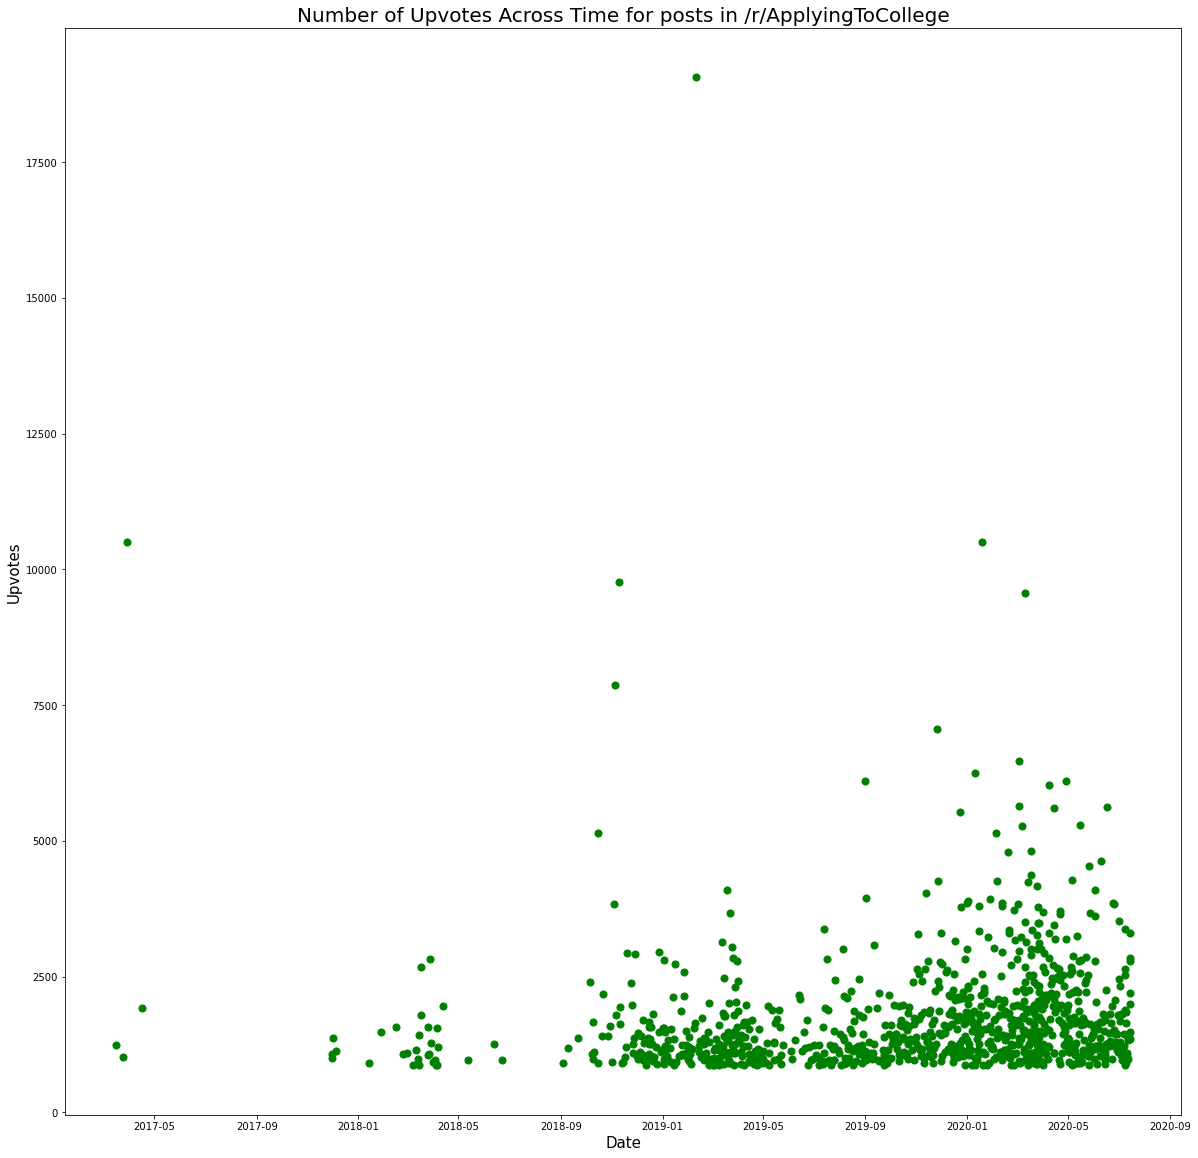

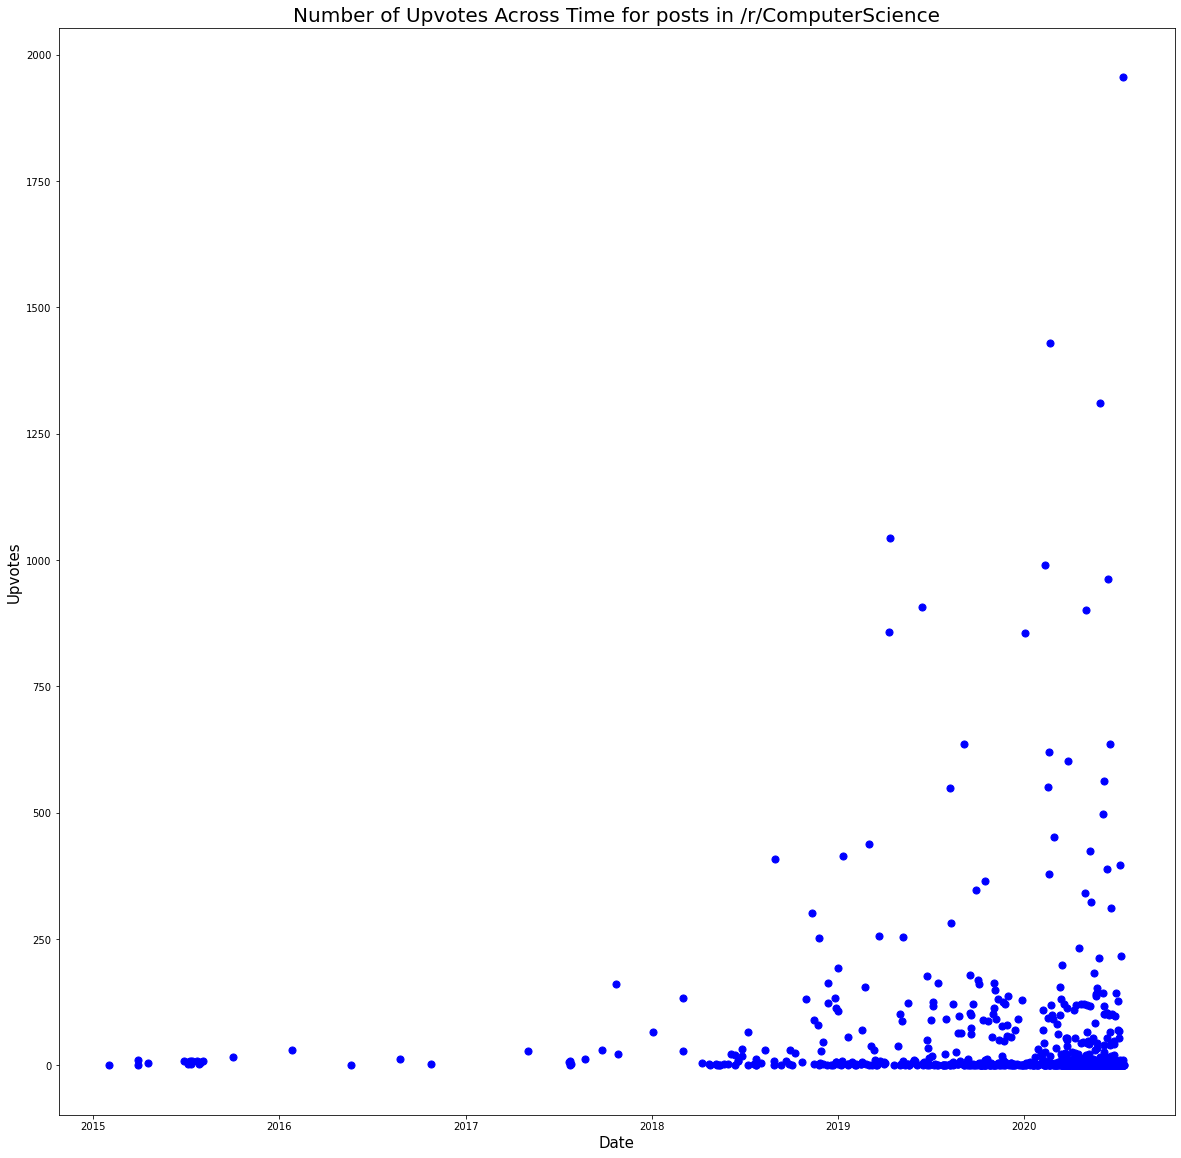

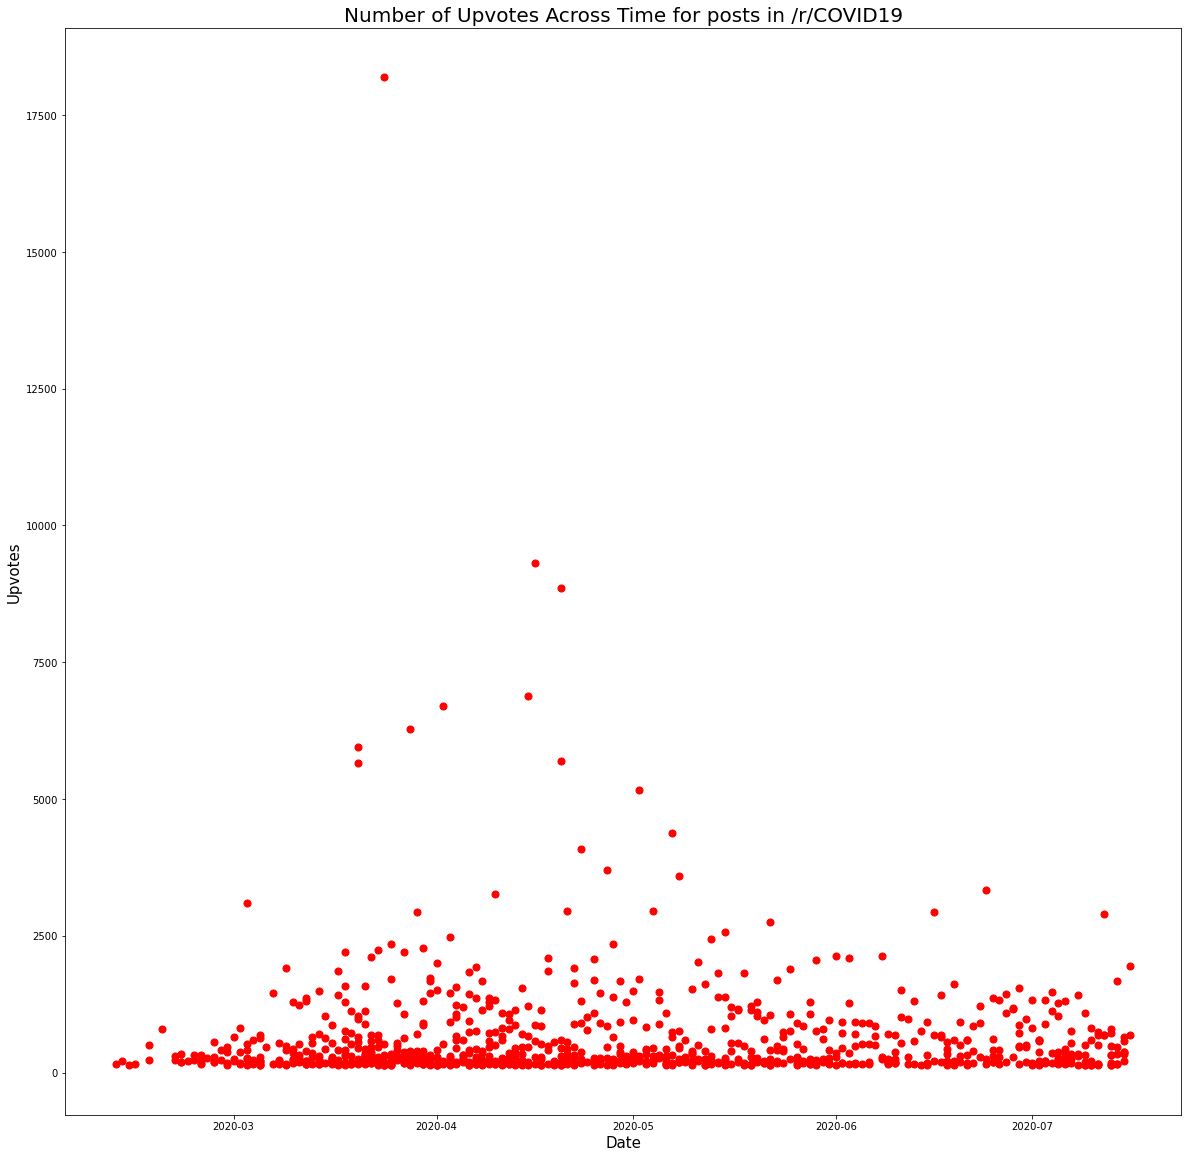

In [6]:
# Seperate the date/time column for the Applying to College dataframe into its own unique
# date and time columns using the String split function.
# Format the date to the datetime format for easier use in the scatter plot
applycollege_data[['date', 'time']] = applycollege_data['creation_date'].str.split(" ", 1, expand=True)
applycollege_data['date'] = pd.to_datetime(applycollege_data['date'], format='%m/%d/%Y')
applycollege_data['date']

# Store the date as the x values and the number of upvotes as the y values
ac_x = applycollege_data['date']
ac_y = applycollege_data['Upvotes']

# Plot the scatter plot for /r/ApplyingToCollege
figure(figsize=(20,20))
plt.scatter(ac_x, ac_y, s=50, c='green')
plt.title("Number of Upvotes Across Time for posts in /r/ApplyingToCollege", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()


# Seperate the date/time column for the Computer Science dataframe into its own unique
# date and time columns using the String split function.
# Format the date to the datetime format for easier use in the scatter plot
compsci_data[['date', 'time']] = compsci_data['creation_date'].str.split(" ", 1, expand=True)
compsci_data['date'] = pd.to_datetime(compsci_data['date'], format='%Y-%m-%d')
compsci_data['date']

# Store the date as the x values and the number of upvotes as the y values
cs_x = compsci_data['date']
cs_y = compsci_data['Upvotes']

# Plot the scatter plot for /r/ComputerScience
figure(figsize=(20,20))
plt.scatter(cs_x, cs_y, s=50, c='blue')
plt.title("Number of Upvotes Across Time for posts in /r/ComputerScience", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()


# Seperate the date/time column for the Covid-19 dataframe into its own unique
# date and time columns using the String split function.
# Format the date to the datetime format for easier use in the scatter plot
covid_data[['date', 'time']] = covid_data['creation_date'].str.split(" ", 1, expand=True)
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%m/%d/%Y')
covid_data['date']

# Store the date as the x values and the number of upvotes as the y values
cv_x = covid_data['date']
cv_y = covid_data['Upvotes']

# Plot the scatter plot for /r/COVID19
figure(figsize=(20,20))
plt.scatter(cv_x, cv_y, s=50, c='red')
plt.title("Number of Upvotes Across Time for posts in /r/COVID19", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()

### Part 3.2 Breakdown of Top Flairs for Each Subreddit [Pie Chart]

#### Results:
The next feature I wanted to analyze was the breakdown of the top flairs for each of the 3 subreddits. Due to the custom nature of flairs (with each subreddit creating their own subreddit-specific flairs), it is difficult to visualize which subreddits actually use the flairs to divide their posts, and which subreddits have flairs that are almost never used. The goal of this analysis was to see just how the breakdown of flairs looked in these three different types of subreddits.

Looking at the results, the results of /r/ComputerScience and /r/COVID19 both pleasantly surprised me with the use of flairs seeming to be prevalent in both subreddits. /r/ComputerScience especially surprised me with the number of posts being almost perfectly evenly across "general, article, help, discussion, and advice." This equal division between the flairs will definitely interesting to remember for the Machine Learning section of our analysis. 

Looking at /r/COVID19, it was interesting to see that the most popular type of post were "Preprints" (academic articles that have not yet been formally peer-reviewed). In fact, the percentage of preprints was more than the percentage of academic report posts and the percentage of press release posts combined. Although this data analysis is not a study on the spread of misinformation, this analysis could potentially be the basis for someone to look into the percentage of those preprints posted on the subreddit that did not perform well in their formal peer review. 

Finally, I expected at least one of the analyzed subreddits to not enforce flairs on all of their posts, so the 54% of posts having no flair in /r/ApplyingToCollege did not come to me as a surprise. While the content of the unflaired posts is impossible to be known at this time, we can see the lighthearted nature of the subreddit seen through the "Shitpost Wednesday, Fluff, and Fun/Memes" posts taking up ~25% of the posts. 

#### Code:
The following code begins by getting the count of each unique flair within the current subreddit. In order to improve the visualization, I chose to limit my pie chart to only include flairs that had more than 5 posts with the flair. As a result, there were several flairs across all three subreddits with <= 5 posts that were not included in the visualization. 

After the list of flairs and their respective counts were stored in their individual lists, I then created a pie chart for each subreddit using the data.

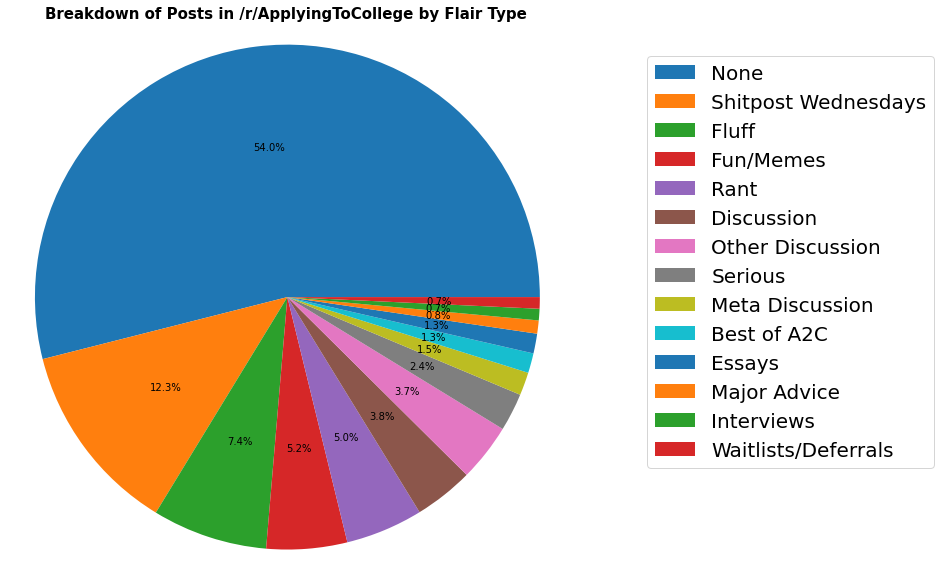

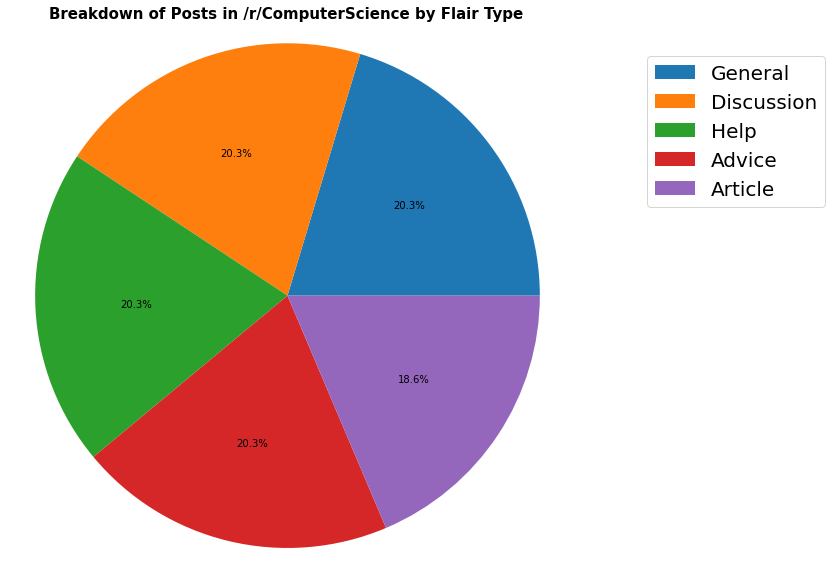

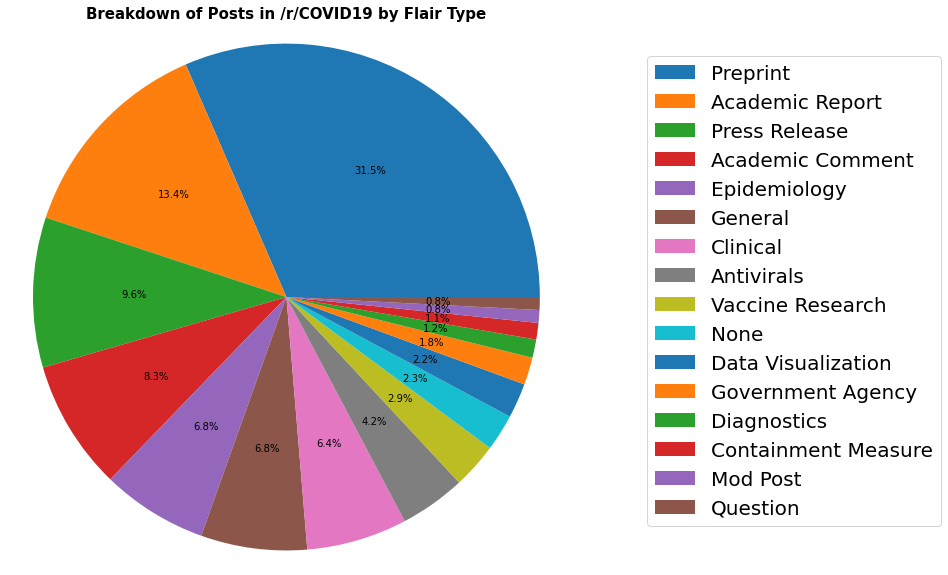

In [7]:
# Retrieve the number of each flair for all of the posts in the Applying to College dataframe
flair_applycollege_series = applycollege_data['Flair'].value_counts()

# Initialize the lists that will store the counts and labels of the flairs of the
# current dataframe
ac_flairLabels = []
ac_flairCounts = []

# In order to improve visualization - drop any flairs in the list that have 5 or less
# posts. Adds all the other flairs and their counts to their respective lists
for index, value in flair_applycollege_series.items():
    if value > 5:
        ac_flairLabels.append(index)
        ac_flairCounts.append(value)

# Plot the piechart and legend for the current dataframe
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(ac_flairCounts, autopct='%1.1f%%')
ax1.axis('equal')
ax1.legend(ac_flairLabels, bbox_to_anchor=(1,0.85), fontsize=20, bbox_transform=plt.gcf().transFigure)
plt.title("Breakdown of Posts in /r/ApplyingToCollege by Flair Type", fontweight="bold", fontsize="15")
plt.show()


# Retrieve the number of each flair for all of the posts in the Computer Science dataframe
flair_compsci_series = compsci_data['Flair'].value_counts()

# Initialize the lists that will store the counts and labels of the flairs of the
# current dataframe
cs_flairLabels = []
cs_flairCounts = []

# In order to improve visualization - drop any flairs in the list that have 5 or less
# posts. Adds all the other flairs and their counts to their respective lists
for index, value in flair_compsci_series.items():
    if value > 5:
        cs_flairLabels.append(index)
        cs_flairCounts.append(value)

# Plot the piechart and legend for the current dataframe
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.pie(cs_flairCounts, autopct='%1.1f%%')
ax2.axis('equal')
ax2.legend(cs_flairLabels, bbox_to_anchor=(1,0.85), fontsize=20, bbox_transform=plt.gcf().transFigure)
plt.title("Breakdown of Posts in /r/ComputerScience by Flair Type", fontweight="bold", fontsize="15")
plt.show()


# Retrieve the number of each flair for all of the posts in the Covid-19 dataframe
flair_covid_series = covid_data['Flair'].value_counts()

# Initialize the lists that will store the counts and labels of the flairs of the
# current dataframe
cv_flairLabels = []
cv_flairCounts = []

# In order to improve visualization - drop any flairs in the list that have 5 or less
# posts. Adds all the other flairs and their counts to their respective lists
for index, value in flair_covid_series.items():
    if value > 5:
        cv_flairLabels.append(index)
        cv_flairCounts.append(value)

# Plot the piechart and legend for the current dataframe
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.pie(cv_flairCounts, autopct='%1.1f%%')
ax3.axis('equal')
ax3.legend(cv_flairLabels, bbox_to_anchor=(1,0.85), fontsize=20, bbox_transform=plt.gcf().transFigure)
plt.title("Breakdown of Posts in /r/COVID19 by Flair Type", fontweight="bold", fontsize="15")
plt.show()

### Part 3.3 Relationship of Comments Vs. Upvotes [Scatter Plot]

#### Results:
This next analysis was the relationship I most wanted to explore. For each subreddit, I wanted to plot each post with the post's x value representing the number of comments on the post and the post's y value representing the number of upvotes received by the post. This analysis (in addition to the analysis in 3.4) were both aimed to support or refute my hypothesis made in the introduction of whether or not there is a direct correlation between the number of comments a post receives and the number of upvotes it gets.

Looking at the results, it appears that my hypothesis was almost entirely refuted. When analyzing each subreddit's graph, there did not appear to be any noticeable positive upwards trend that suggested a post having more comments would perform better. 

Beginning with the /r/ApplyingToCollege graph, whether it was due to the selection of the posts within the dataset, or for another reason, it appears that posts in this subreddit seemed to do better when there were not an excess number of comments. Posts with close to 400 comments would receive ~1200 upvotes, while posts with less than 50 comments would receive ~2700 upvotes. Due to the subreddit's purpose, this analysis may support the belief that a large number of comments on a post means that the question asked by the original post's author was too complicated / not a good question. As a result, it may not have gotten as positive a reception as a post with an easily answerable question (and a question that potentially many others had). 

Moving onto the graphs for /r/ComputerScience and /r/COVID19, the vast majority of the points for both graphs are within the bottom left of the graph. However, as the number of comments increased, there was once again no clear trend that indicated an increase in the number of upvotes. The points outside of the dense group as a whole however slightly moved in an upwards positive direction. 

Although the analysis of these three subreddits contributed to the refutation of my hypothesis, I would still be very interested to see if there is no trend seen when analyzing a selection of posts from a variety of random subreddits. 

#### Code:
The following code prepares the data for each subreddit to be plotted. In order to improve the visualization of the scatter plot and to see if there are any noticeable trends, I chose to focus on a subset of the data for each subreddit (effectively removing the outliers). This was primarily due to the view of the scatter plot being extremely zoomed out after it was created. 

I created these subsets by identifying a max number of comments and upvotes that would serve as the cutoff for each subreddit. For example, in the Applying to College dataset, I only looked at posts with less than 400 comments and less than 3000 upvotes.

After I created the subset of data, I stored the number of comments as the X value and the number of upvotes as the Y value to be then used in the scatter plot. Similar to the graphs created in 3.1, each graph was colored for easy visualization.

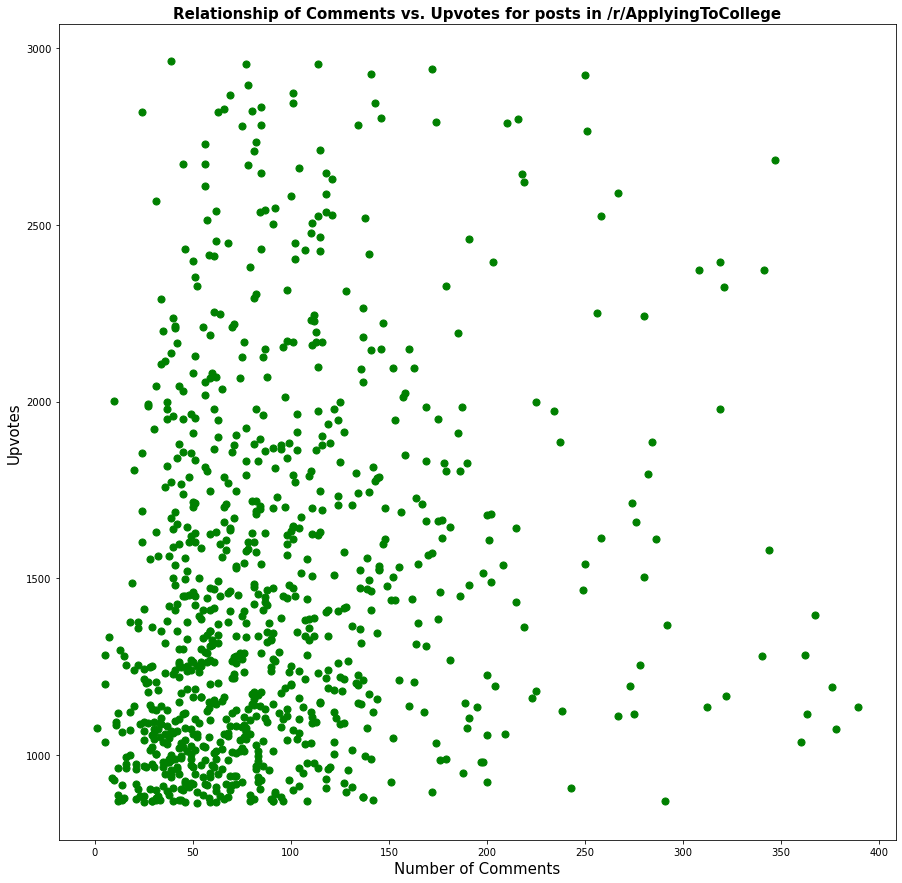

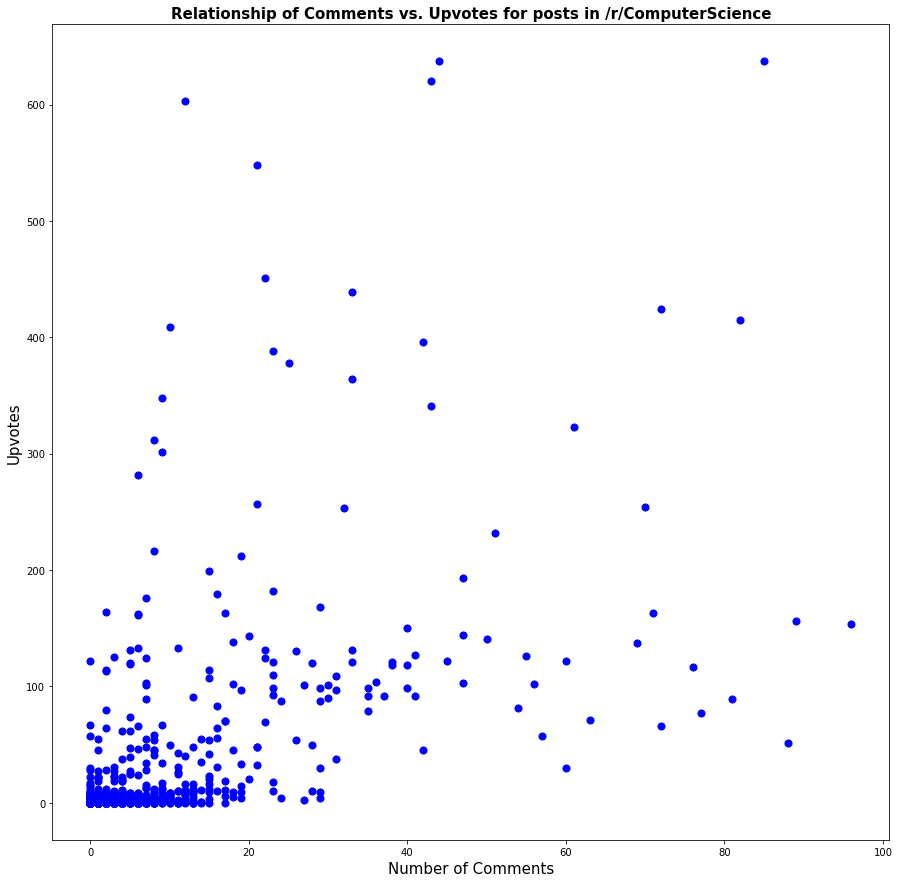

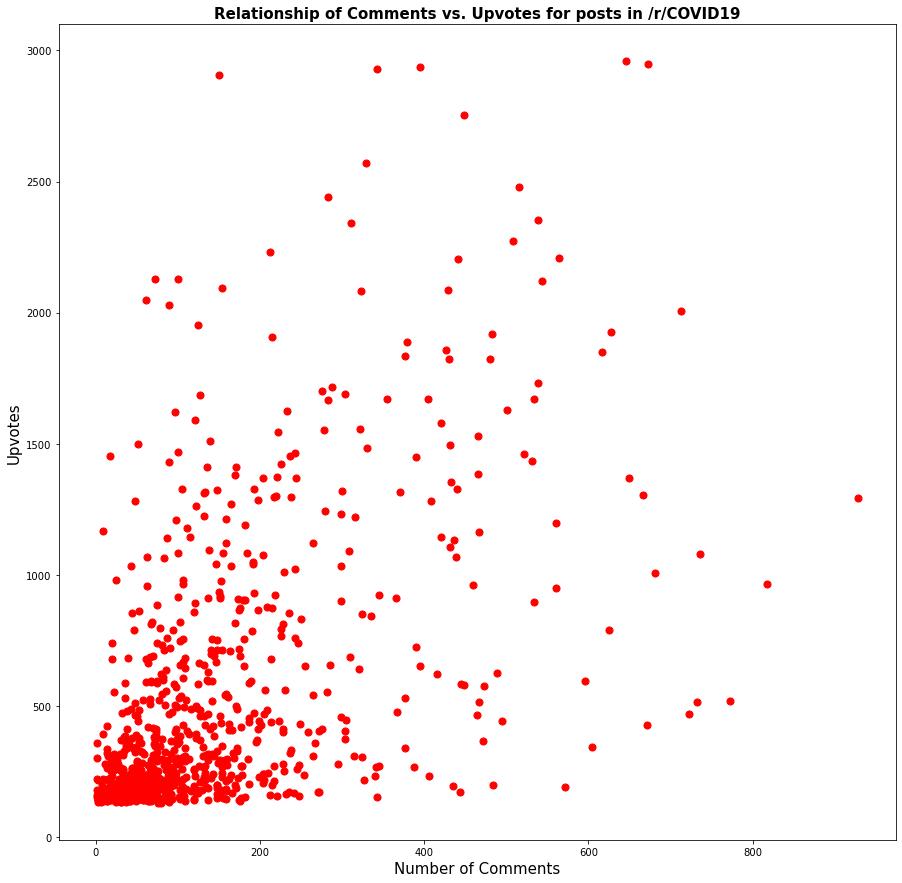

In [8]:
# In order to identify if there are any trends between comments and upvotes, we choose to 
# focus on a subset of the data (and remove the outliers). 
# For the Applying to College dataset, we are only looking at posts with less than 400 
# comments and less than 3000 upvotes.
applycollege_subset_data = applycollege_data.loc[(applycollege_data['num_comments'] < 400) 
                                                 & (applycollege_data['Upvotes'] < 3000)]

# Store the X and Y list values that will be plotted for the current subset being analyzed
ac_commentsX = applycollege_subset_data['num_comments']
ac_upvotesY = applycollege_subset_data['Upvotes']

# Plot the scatter plot for the current subset
figure(figsize=(15,15))
plt.scatter(ac_commentsX, ac_upvotesY, s=50, c='green')
plt.title("Relationship of Comments vs. Upvotes for posts in /r/ApplyingToCollege", fontweight="bold", fontsize=15)
plt.xlabel('Number of Comments', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()


# For the Computer Science dataset, we are only looking at posts with less than 100 
# comments and less than 700 upvotes.
compsci_subset_data = compsci_data.loc[(compsci_data['num_comments'] < 100) 
                                                 & (compsci_data['Upvotes'] < 700)]

# Store the X and Y list values that will be plotted for the current subset being analyzed
cs_commentsX = compsci_subset_data['num_comments']
cs_upvotesY = compsci_subset_data['Upvotes']

# Plot the scatter plot for the current subset
figure(figsize=(15,15))
plt.scatter(cs_commentsX, cs_upvotesY, s=50, c='blue')
plt.title("Relationship of Comments vs. Upvotes for posts in /r/ComputerScience", fontweight="bold", fontsize=15)
plt.xlabel('Number of Comments', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()


# For the Covid-19 dataset, we are only looking at posts with less than 1000 
# comments and less than 3000 upvotes.
covid_subset_data = covid_data.loc[(covid_data['num_comments'] < 1000) 
                                                 & (covid_data['Upvotes'] < 3000)]

# Store the X and Y list values that will be plotted for the current subset being analyzed
cv_commentsX = covid_subset_data['num_comments']
cv_upvotesY = covid_subset_data['Upvotes']

# Plot the scatter plot for the current subset
figure(figsize=(15,15))
plt.scatter(cv_commentsX, cv_upvotesY, s=50, c='red')
plt.title("Relationship of Comments vs. Upvotes for posts in /r/COVID19", fontweight="bold", fontsize=15)
plt.xlabel('Number of Comments', fontsize=15)
plt.ylabel('Upvotes', fontsize=15)
plt.show()

### Part 3.4 Correlation Matrices for Upvotes & Comments [Heatmap]

#### Results:
This final analysis looked at the same correlation between upvotes and comments but from a numerical viewpoint. After concluding the project, I recognize that Heatmaps greatly benefit from additional numerical features to draw correlations between. However, due to the limitations of the data, I settled for a 2x2 matrix to focus on the relationship between upvotes and comments. 

As seen by these matrices, the results of the scatter plots in 3.3 were reflected with the correlations found for each subreddit. /r/COVID19 appeared to have the strongest correlation between the number of comments and upvotes (with a value of 0.52), with /r/ComputerScience right behind with a value of 0.49. As suspected by the scatter plot for /r/ApplyingToCollege, this matrix had the smallest value of 0.34 (indicating the least amount of correlation between the number of comments and the number of upvotes.

The correlation matrix could be very useful given further analysis on this relationship across multiple subreddits (and with perhaps more features to analyze and expand the matrix). Although the scatter plot allows for a visual view of the correlation, the correlation matrix allows for numerical comparisons that can lead to future analyses. 

#### Code:
The following code uses Seaborn to generate a 2x2 correlation matrix for each of the subreddits, comparing the number of upvotes against the number of comments for each post. 

In order to generate the heatmap, I began by first creating a copy of the dataframe in order to drop any columns that may have interrupted the heatmap generation. Once the dataframe was prepared, I used the seaborn heatmap function to generate the correlation matrix and added different colors to improve visualization of the data. 

<function matplotlib.pyplot.show(close=None, block=None)>

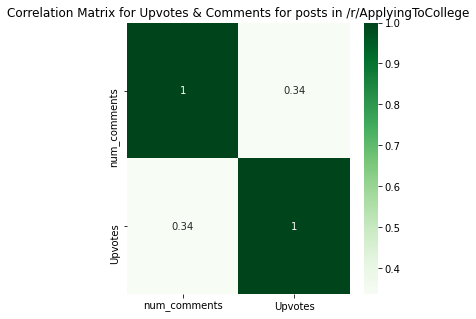

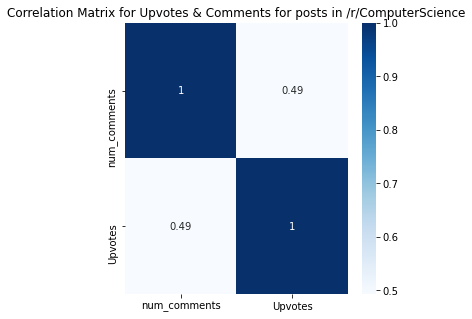

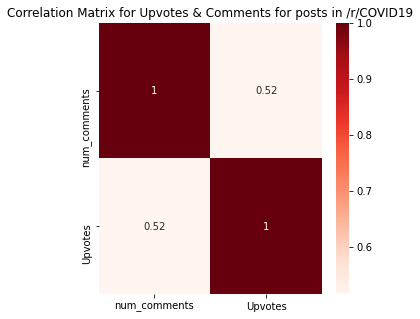

In [9]:
# Make a copy of the Covid-19 dataframe in order to modify the columns to only the information
# needed by the correlation matrix. 
applycollege_heatmap = applycollege_data
applycollege_heatmap = applycollege_heatmap.drop(columns = 'is_Original')

# Plot the 2 x 2 correlation matrix for the current subreddit (this particular graph 
# can be improved given more information)
plt.figure(figsize=(5,5))
sns.heatmap(applycollege_heatmap.corr(), annot=True, 
            cmap='Greens').set(title="Correlation Matrix for Upvotes & Comments for posts in /r/ApplyingToCollege")
plt.show


# Make a copy of the Computer Science dataframe in order to modify the columns to 
# only the information needed by the correlation matrix. 
compsci_heatmap = compsci_data
compsci_heatmap = compsci_heatmap.drop(columns = 'is_Original')

# Plot the 2 x 2 correlation matrix for the current subreddit (this particular graph 
# can be improved given more information)
plt.figure(figsize=(5,5))
sns.heatmap(compsci_heatmap.corr(), annot=True, 
            cmap='Blues').set(title="Correlation Matrix for Upvotes & Comments for posts in /r/ComputerScience")
plt.show


# Make a copy of the Covid-19 dataframe in order to modify the columns to only the information
# needed by the correlation matrix. 
covid_heatmap = covid_data
covid_heatmap = covid_heatmap.drop(columns = 'is_Original')

# Plot the 2 x 2 correlation matrix for the current subreddit (this particular graph 
# can be improved given more information)
plt.figure(figsize=(5,5))
sns.heatmap(covid_heatmap.corr(), annot=True, 
            cmap='Reds').set(title="Correlation Matrix for Upvotes & Comments for posts in /r/COVID19")
plt.show

## Part 4: Machine Learning [Decision Tree (Classification)]

With the EDA portion of our code successfully addressing (and in this case - refuting) our initial hypothesis, it is now time to move into the Machine Learning portion of the code. 

In the Introduction, in addition to my hypothesis, I also posed the question of whether or not it would be possible to identify what flair a post has based on the number of upvotes and the number of comments it has. Although I am not fully confident that a Machine Learning model can successfully classify these posts into their correct flairs, this is exactly the time where introducing Machine Learning into a data analysis project is the best decision. 

For my code I am choosing to use the Decision Tree Classification method as my model for classifying each of these posts. I will also be using a holdout testing method, with 70% of the data being used for the training set and 30% of the data being used for testing. 

### Results:
As stated earlier, going into this portion of the code, I did not believe that the Machine Learning model would perform particularly well in classifying the reddit posts into its correct type of flair. The primary reason for my belief was due to the overall lack of data that was able to be fed into the model to help influence its decision. Perhaps, given more input variables, the model could process more information that would help improve its overall accuracy. 

However, the low prediction accuracy helped answer my second initial question of: whether or not the number of upvotes and number of comments indicates the type of flair that a post has in a specific subreddit. It appears that (at least to a ML model), there is no real correlation between the number of upvotes and number of comments and the flair on a particular post.

Looking at the specific results, while the model performed significantly better for the Applying to College dataset, as found in the pie charts of 3.2, /r/ApplyingToCollege has the majority of it's posts with no flair at all. As a result, if the model guessed a post having no flair, it was likely to get it right. 

/r/ComputerScience ended up performing a little better than /r/COVID19, which can possible be attributed to the almost perfectly equal distribution of flairs seen in the Computer Science subreddit. 

### Code:

The following code uses skLearn's Decision Tree Classifier to train and test 3 different classifiers on each of the three datasets. The process for each classifier followed the same steps as modeled in the examples seen on the scikit-learn website:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

Each model was trained on 70% of each individual dataset. The 70/30 ratio was chosen as it proved to perform the best compared to other tested ratios (resulted in the least amount of general over/underfitting). 

Finally, each model was then tested against the remaining 30% and the accuracy of the classifier was then printed out for analysis. 

In [10]:
# Imports to be used as part of the Machine Learning Section
import sklearn
from sklearn.metrics import accuracy_score # Used for classifier performance metric testing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Transform categorical column to quantitative and store only quantitative columns 
# in a copy of the dataframe for analysis
applycollege_dt = applycollege_data
applycollege_dt['is_Original'] = applycollege_dt['is_Original'].astype(int)
applycollege_dt = applycollege_dt[['is_Original', 'Upvotes', 'num_comments', 'Flair']]

# Turn the categorical flair column into quantitative values using the pandas factorize tool
applycollege_FlairCodes, applycollege_UniqueFlairs = pd.factorize(applycollege_dt['Flair'])

# Store x and y values that will be split into test and train subsets
ac_dtX = applycollege_dt[['is_Original', 'Upvotes', 'num_comments']]
ac_dtY = applycollege_FlairCodes

X_train, X_test, y_train, y_test = train_test_split(ac_dtX, ac_dtY, test_size=0.3, random_state = 0)

# Print the sizes of the training and test dataset
print("/r/ApplyingToCollege Decision Tree Train shape:", X_train.shape, y_train.shape)
print("/r/ApplyingToCollege Decision Tree Test shape:", X_test.shape, y_test.shape)

# Decision Tree:

# Train the Random Forests Analysis classifier on the training data
# set (70% of the total data set)
dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 5)
dt_clf.fit(X_train, y_train)

# Use the DT classifier to predict the Y values for the X test values
dt_prediction = dt_clf.predict(X_test)

# Measure the accuracy of the RF classifier by comparing the predicted values
# against the actual values
dt_accuracy = accuracy_score(dt_prediction, y_test)

# Format and print the accuracy for easier reading
dt_print_accuracy = "{:.2%}".format(dt_accuracy)
print("\nDecision Tree Accuracy for Predicting Flair Type of Posts in /r/ApplyingToCollege:", dt_print_accuracy)

/r/ApplyingToCollege Decision Tree Train shape: (696, 3) (696,)
/r/ApplyingToCollege Decision Tree Test shape: (299, 3) (299,)

Decision Tree Accuracy for Predicting Flair Type of Posts in /r/ApplyingToCollege: 52.84%


In [12]:
# Transform categorical column to quantitative and store only quantitative columns 
# in a copy of the dataframe for analysis
compsci_dt = compsci_data
compsci_dt['is_Original'] = compsci_dt['is_Original'].astype(int)
compsci_dt = compsci_dt[['is_Original', 'Upvotes', 'num_comments', 'Flair']]

# Turn the categorical flair column into quantitative values using the pandas factorize tool
compsci_FlairCodes, compsci_UniqueFlairs = pd.factorize(compsci_dt['Flair'])

# Store x and y values that will be split into test and train subsets
cs_dtX = compsci_dt[['is_Original', 'Upvotes', 'num_comments']]
cs_dtY = compsci_FlairCodes

X_train, X_test, y_train, y_test = train_test_split(cs_dtX, cs_dtY, test_size=0.3, random_state = 0)

# Print the sizes of the training and test dataset
print("/r/ComputerScience Decision Tree Train shape:", X_train.shape, y_train.shape)
print("/r/ComputerScience Decision Tree Test shape:", X_test.shape, y_test.shape)

# Decision Tree:

# Train the Random Forests Analysis classifier on the training data
# set (70% of the total data set)
dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 5)
dt_clf.fit(X_train, y_train)

# Use the DT classifier to predict the Y values for the X test values
dt_prediction = dt_clf.predict(X_test)

# Measure the accuracy of the RF classifier by comparing the predicted values
# against the actual values
dt_accuracy = accuracy_score(dt_prediction, y_test)

# Format and print the accuracy for easier reading
dt_print_accuracy = "{:.2%}".format(dt_accuracy)
print("\nDecision Tree Accuracy for Predicting Flair Type of Posts in /r/ComputerScience:", dt_print_accuracy)

/r/ComputerScience Decision Tree Train shape: (688, 3) (688,)
/r/ComputerScience Decision Tree Test shape: (296, 3) (296,)

Decision Tree Accuracy for Predicting Flair Type of Posts in /r/ComputerScience: 35.14%


In [13]:
# Transform categorical column to quantitative and store only quantitative columns 
# in a copy of the dataframe for analysiscovid_dt = covid_data
covid_dt = covid_data
covid_dt['is_Original'] = covid_dt['is_Original'].astype(int)
covid_dt = covid_dt[['is_Original', 'Upvotes', 'num_comments', 'Flair']]

# Turn the categorical flair column into quantitative values using the pandas factorize tool
covid_FlairCodes, covid_UniqueFlairs = pd.factorize(covid_dt['Flair'])

cv_dtX = covid_dt[['is_Original', 'Upvotes', 'num_comments']]
cv_dtY = covid_FlairCodes

# Store x and y values that will be split into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(cv_dtX, cv_dtY, test_size=0.3, random_state = 0)

# Print the sizes of the training and test dataset
print("/r/COVID19 Decision Tree Train shape:", X_train.shape, y_train.shape)
print("/r/COVID19 Decision Tree Test shape:", X_test.shape, y_test.shape)

# Decision Tree:

# Train the Random Forests Analysis classifier on the training data
# set (70% of the total data set)
dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 5)
dt_clf.fit(X_train, y_train)

# Use the DT classifier to predict the Y values for the X test values
dt_prediction = dt_clf.predict(X_test)

# Measure the accuracy of the RF classifier by comparing the predicted values
# against the actual values
dt_accuracy = accuracy_score(dt_prediction, y_test)

# Format and print the accuracy for easier reading
dt_print_accuracy = "{:.2%}".format(dt_accuracy)
print("\nDecision Tree Accuracy for Predicting Flair Type of Posts in /r/COVID19:", dt_print_accuracy)

/r/COVID19 Decision Tree Train shape: (618, 3) (618,)
/r/COVID19 Decision Tree Test shape: (266, 3) (266,)

Decision Tree Accuracy for Predicting Flair Type of Posts in /r/COVID19: 27.44%


## Conclusion

And that concludes my tutorial on a Data Science Analysis project! Overall, I had quite a lot of fun getting to walk through the major steps of data analysis with a dataset of my own choosing. Coming up with my own relationships to look at was definitely stressful to think about, however getting to see the results (and seeing those results completely refute my initial hypothesis) was a very fun experience. Although my Machine Learning model did not perform extremely well, it was still interesting to see if the computer could go through and draw relations between variables that I would never have been able to. 

Additionally, working with a dataset that did not have a plethora of information to draw from definitely posed some challenges throughout my analysis, however I am proud of the ways I came up with to use as much of the data as I had as possible. Moving forward, I think that one aspect of this project that I was unable to look at (but could possibly be an area of further research) is analyzing the words used in the title of each post. Did some words perform better than others? Was a certain word being repeated which potentially influenced the number of upvotes / comments? Could my decision tree perform better if it is also fed the words of the title of the post? These are just a few of the questions that I would look into if I were to continue this project moving forward.

However, to conclude my project as a whole - I hope that this tutorial was an interesting read for anyone interested in the process of conducting a data science project! Thank you again to Prakhar Rathi for curating and providing the data.

If you would like to access my github repository to see my notebook, click the link below:

- https://github.com/Ronak-Thakur/Reddit-Posts-Analysis